Описание проекта 1: в первой части необходимо проанализировать какие гипотезы следует реализовать в какой последовательности исходя из определённых показателей

Дан датасет в котором каждой теориии присвоен ряд характеристик
1. Reach  охват аудитории, который затронет от внедрения данной гипотезы
2. Impact  то насколько сильно изменение повлияет при его внедрении
3. Confidence уверенность, что изменение повлияют то насколько они оценены
4. Efforts стоимость тестировки идеи
Изходя из всех этих характеристик нужно просчитать приоритезацию задач

Описание проета 2: во второй части проекта необходимо проанализировать проведённый А/В тест, на основе имеющихся датасетов (собранных данных за время проведения теста). Задача стоит в том чтобы ответить на вопрос, повлияли ли внедрённые изменения, и если повлияли то как и насколько (приносят ли они выгоду организации)  

Дано два датасета в 1-ом даны заказы пользователей, есть id каждого пользователя, id заказа, группа (А или В) в которой заказ был выполнен и этим трём характеристикам соответсвует сумма на которую каждый такой заказ был сделан. Второй датасет показывает на каждую дату по каждой группе сколько было посетителей. 

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt 

Изучим предпологаемые к внедрению гипотезы, и сделаем их приоритезацию, на основе имеющихся показателей 'Reach', 'Impact', 'Confidence', 'Efforts'

In [2]:
hyp = pd.read_csv('hypothesis.csv')

In [3]:
print(hyp)

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


In [4]:
print(hyp.columns)

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')


Для приоритезации задач вычеслим параметр ICE и RICE

In [5]:
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence']) / hyp['Efforts']

In [6]:
hyp = hyp.sort_values(by='ICE', ascending=False)

In [7]:
print(hyp['Hypothesis'])

8    Запустить акцию, дающую скидку на товар в день...
0    Добавить два новых канала привлечения трафика,...
7    Добавить форму подписки на все основные страни...
6    Показать на главной странице баннеры с актуаль...
2    Добавить блоки рекомендаций товаров на сайт ин...
1    Запустить собственную службу доставки, что сок...
5    Добавить страницу отзывов клиентов о магазине,...
3    Изменить структура категорий, что увеличит кон...
4    Изменить цвет фона главной страницы, чтобы уве...
Name: Hypothesis, dtype: object


In [8]:
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence']) / hyp['Efforts']
hyp = hyp.sort_values(by='RICE', ascending=False)
pd.options.display.max_colwidth = 100
print(hyp)



                                                                                            Hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

Вывод параветр RICE и ICE не существенно но отличаются, данные изменения произошли после учёта параметра Reach (кол-во пользователей которых затронет изменение), те гипотезы которые были при анализе параметра ICE были на более высоком месте, из за не столько широкого охвата действующих пользователей, сместились на немного низкие позиции. 

на первом месте по значимости у нас стала гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' данная гипотеза вышла в лидеры за счёт за счёт широкого охвата, по характеристике охвата гипотеза занимает первое место, у гипоттезы средний показатель Impact, т.е внедрение гиппотезы хорошо повлияет на результат, но гипотеза обладает высокой,хоть и не самой, оценкой уверенности (Confidence = 8), и высрким показателям Efforts стоимости внедрения. В совокупности гипотеза имеет не самые высокие показатели, но зато достаточно высокие по всем показателям, и средние по стоимости внедрения к внедрению.

На втором месте с большим отставанием идёт гиппотеза 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
У гиппотезы  высокие показатель Confidence и Reach маленький показатель Impact, но очень хороший показатель Efforts 

На третьем месте гиппотеза 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' у данной гипотезы самый высокий показатель Impact и очень высокий показатель Confidence, но низкий Reach  и большая стоимость к внедрению, ставит гипотезу на третье место

На третьем месте так же находится теория 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию' у этой гипотезы противоположенная ситуация три характеристики (Reach  Impact  Confidence) очень низкие, но так же и самая низкая стоимость внедрения, что делает эту гиппотезу равноценной предыдущей

Остальные гиппотезы, намного хуже по оценкам, стоит сосрнедоточиться на внедрении 4-х предыдущих


Проанализируйте A/B-тест

In [9]:
orders = pd.read_csv('orders.csv')
visits = pd.read_csv('visitors.csv')

In [10]:
display(orders.head())
display(visits.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Переименую столбцы для удобства

In [11]:
orders = orders.rename(columns={'transactionId':'order_id', 'visitorId' : 'user_id'}) 
display(orders.columns)
display(visits.columns)

Index(['order_id', 'user_id', 'date', 'revenue', 'group'], dtype='object')

Index(['date', 'group', 'visitors'], dtype='object')

проверим данные на корректность

In [12]:
display(orders.duplicated().sum())
display(orders.info())
display(orders['revenue'].describe())

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  1197 non-null   int64 
 1   user_id   1197 non-null   int64 
 2   date      1197 non-null   object
 3   revenue   1197 non-null   int64 
 4   group     1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

array([   8290.  ,    8779.88,    9047.92,    9448.  ,    9866.8 ,
         10239.  ,   10835.84,   11653.56,   12431.6 ,   13299.64,
         14212.  ,   15035.92,   16073.08,   16969.2 ,   17825.44,
         18168.  ,   19247.2 ,   19525.76,   21312.4 ,   25120.8 ,
         28000.  ,   31382.  ,   35485.  ,   44133.2 ,   58233.2 ,
       1294500.  ])

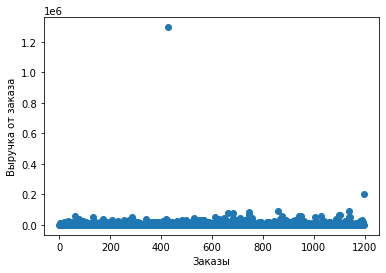

In [13]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.xlabel('Заказы')
plt.ylabel('Выручка от заказа')
plt.scatter(x_values, orders['revenue'])
np.percentile(orders['revenue'], list(x for x in range(75,101)))

In [14]:
print(np.percentile(orders['revenue'], list(x for x in range(1,101)) ))

[1.000000e+02 1.292000e+02 1.900000e+02 2.900000e+02 3.000000e+02
 3.597600e+02 3.900000e+02 4.000000e+02 4.200000e+02 4.700000e+02
 5.000000e+02 5.800000e+02 6.148000e+02 6.900000e+02 7.400000e+02
 7.800000e+02 8.300000e+02 8.900000e+02 9.272000e+02 9.900000e+02
 9.950000e+02 1.090000e+03 1.120000e+03 1.190000e+03 1.220000e+03
 1.290000e+03 1.390000e+03 1.448800e+03 1.490000e+03 1.530000e+03
 1.587600e+03 1.640000e+03 1.709040e+03 1.790000e+03 1.836000e+03
 1.889480e+03 1.950000e+03 1.990000e+03 2.070000e+03 2.210000e+03
 2.312320e+03 2.355000e+03 2.424480e+03 2.502400e+03 2.550000e+03
 2.613200e+03 2.675920e+03 2.790800e+03 2.938480e+03 2.978000e+03
 3.070000e+03 3.190000e+03 3.316400e+03 3.446800e+03 3.488000e+03
 3.597600e+03 3.798720e+03 4.008000e+03 4.204600e+03 4.483000e+03
 4.690000e+03 4.880000e+03 4.990000e+03 5.132640e+03 5.338000e+03
 5.530000e+03 5.749600e+03 6.068400e+03 6.266720e+03 6.441800e+03
 6.677640e+03 6.990000e+03 7.397600e+03 7.990000e+03 8.290000e+03
 8.779880e

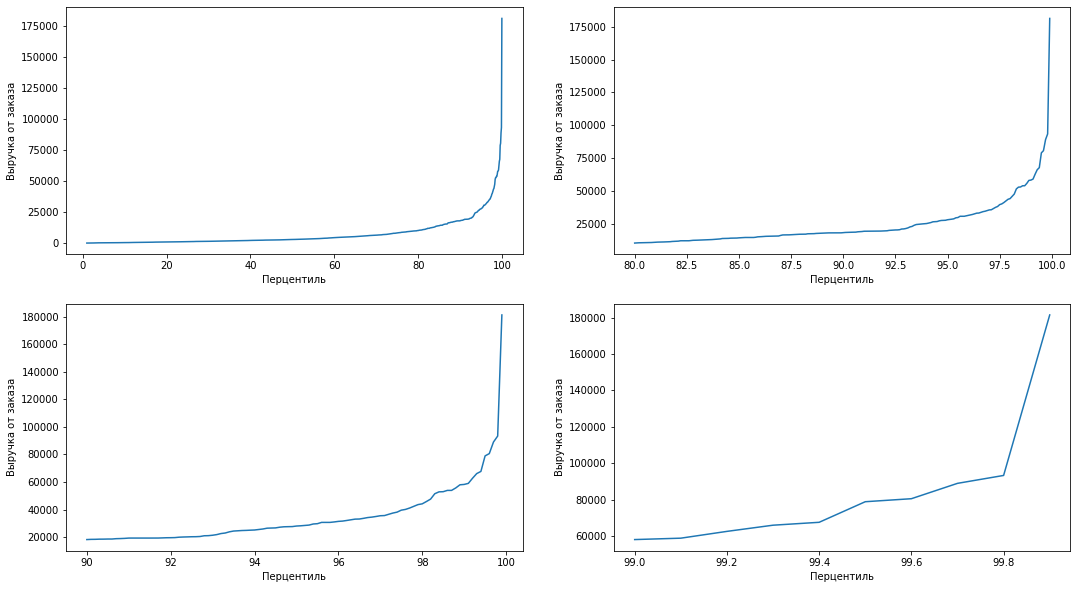

In [15]:

procents = list(x for x in np.arange(1,100, 0.1))

plt.figure(figsize=(18,10)) 
plt.subplot(2,2,1)
plt.xlabel('Перцентиль')
plt.ylabel('Выручка от заказа')
plt.plot(np.arange(1,100,0.1), pd.Series(list(np.percentile(orders['revenue'], list(x for x in np.arange(1,100,0.1))))))
plt.subplot(2,2,2)
plt.xlabel('Перцентиль')
plt.ylabel('Выручка от заказа')
plt.plot(np.arange(80,100,0.1), pd.Series(list(np.percentile(orders['revenue'], list(x for x in np.arange(80,100,0.1))))))
plt.subplot(2,2,3)
plt.xlabel('Перцентиль')
plt.ylabel('Выручка от заказа')
plt.plot(np.arange(90,100,0.1), pd.Series(list(np.percentile(orders['revenue'], list(x for x in np.arange(90,100,0.1))))))
plt.subplot(2,2,4)
plt.xlabel('Перцентиль')
plt.ylabel('Выручка от заказа')
plt.plot(np.arange(99,100,0.1), pd.Series(list(np.percentile(orders['revenue'], list(x for x in np.arange(99,100,0.1))))))
plt.show()

Выброс в показателе суммы заказа отмечен у 0,2 процентов пользователей

Анализируя датафрейм orders можно сказать:
1. Дубликатов нет
2. Отсутсвующих значений нет
3. Отклонение суммы заказов (слишком большие по стоимости затраты искажают данные ) у 1 процента пользоватетей (особенно у 0,2 %)
4. нужно перевести даты в соответствующий формат


In [16]:
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

Построим график кумулятивной выручки по группам

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )]
    .agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,order_id,user_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


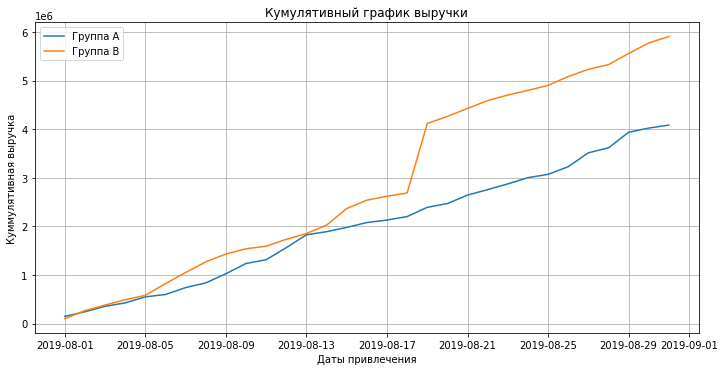

In [18]:
orders_a = ordersAggregated.query('group == "A"')
plt.figure(figsize=(10, 5))
plt.plot(orders_a.date, orders_a.revenue, label = 'Группа А')

orders_b = ordersAggregated.query('group == "B"')
plt.plot(orders_b.date, orders_b.revenue, label = 'Группа B')
plt.tight_layout()
plt.xlabel('Даты привлечения')
plt.ylabel('Куммулятивная выручка')
plt.title('Кумулятивный график выручки')
plt.grid()
plt.legend()

plt.show()

Куммулитивный график выручки лучше у группы B  до половины наблюдаемого переиода, показатель кумулятивной выручки, был почти одинаков, затем по группе В произошёл резкий скачёк выручки, а затем разница в выручке сохранялась и оставалась на том же уровне. 

Построем график кумулятивного среднего чека по группам

Необходимо посчитать кумулятивный приход клиентов по дням

In [19]:
datesGroups = visits[['date','group']].drop_duplicates()
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),
    axis=1).sort_values(by=['date','group'])
visitsAggregated.head()

,date,group,visitors
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,1338
32,2019-08-02,B,1294
2,2019-08-03,A,1845


Объединим таблицы кумулятивный приход клиентов и кумулятивной выручки  

In [20]:
df = ordersAggregated.merge(visitsAggregated, on=['date', 'group'], how='outer')
df.columns = ['date','group','orders','users','revenue', 'visitors']
df.head()

,date,group,orders,users,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Посчитаем средний чек

In [21]:
df['mean_chek'] = df.revenue / df.orders
df.head()

,date,group,orders,users,revenue,visitors,mean_chek
0,2019-08-01,A,24,20,148579,719,6190.791667
1,2019-08-01,B,21,20,101217,713,4819.857143
2,2019-08-02,A,44,38,242401,1338,5509.113636
3,2019-08-02,B,45,43,266748,1294,5927.733333
4,2019-08-03,A,68,62,354874,1845,5218.735294


Разделим датафрейм по группам и построим графики  кумулятивного среднего чека

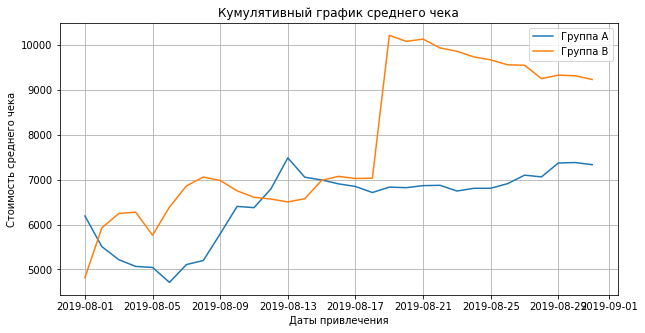

In [22]:
df_a = df.query('group == "A"')
df_b = df.query('group == "B"')

plt.figure(figsize=(10, 5))
plt.plot(df_a.date, df_a.mean_chek, label = 'Группа А')

plt.plot(df_b.date, df_b.mean_chek, label = 'Группа B')
plt.xlabel('Даты привлечения')
plt.ylabel('Стоимость среднего чека')
plt.title('Кумулятивный график среднего чека')
plt.grid()
plt.legend()

plt.show()

График среднего чека по группе B имел хорошую динамику и постепенно повышался, до 08.17, после чего резко вырос. Затем после резкого скачка, наблюдается постепенное падение показателя, что достаточно настараживает. Группа А по среднему чеку хоть и находится ниже в сравнении с группой В, после несильного паденияня  показателя 08.13, показатель растёт очень медленно.

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

Вычислим параметр  кумулятивного исменения среднего чека

In [23]:
df_all = df_a.merge(df_b, on='date', how='outer', suffixes=['A', 'B'])
df_all.head()

,date,groupA,ordersA,usersA,revenueA,visitorsA,mean_chekA,groupB,ordersB,usersB,revenueB,visitorsB,mean_chekB
0,2019-08-01,A,24,20,148579,719,6190.791667,B,21,20,101217,713,4819.857143
1,2019-08-02,A,44,38,242401,1338,5509.113636,B,45,43,266748,1294,5927.733333
2,2019-08-03,A,68,62,354874,1845,5218.735294,B,61,59,380996,1803,6245.836066
3,2019-08-04,A,84,77,425699,2562,5067.845238,B,78,75,489567,2573,6276.500000
4,2019-08-05,A,109,100,549917,3318,5045.110092,B,101,98,581995,3280,5762.326733


[]

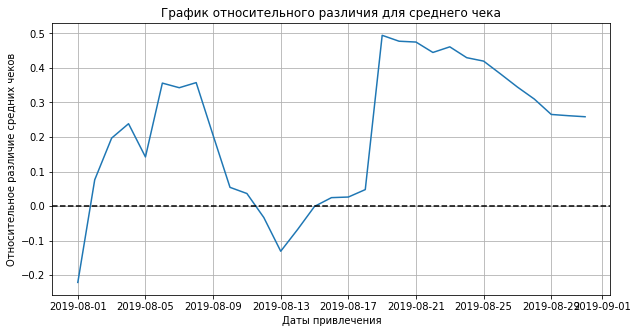

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df_all['date'], df_all['mean_chekB']/df_all['mean_chekA']-1)
plt.xlabel('Даты привлечения')
plt.ylabel('Относительное различие средних чеков')
plt.title('График относительного различия для среднего чека')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--') 
plt.plot()

Видно что график волантильный, но в целом имеет положительную динамику за наблюдаемый период

Построим график кумулятивной конверсии по группам

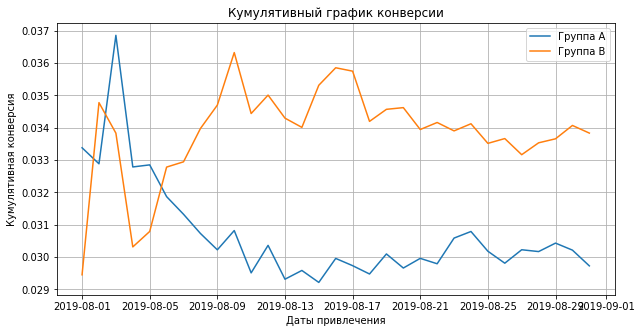

In [25]:
df['conversion'] = df.orders / df.visitors
df_a = df.query('group == "A"')
df_b = df.query('group == "B"')

plt.figure(figsize=(10, 5))
plt.plot(df_a.date, df_a.conversion, label = 'Группа А')

plt.plot(df_b.date, df_b.conversion, label = 'Группа B')
plt.xlabel('Даты привлечения')
plt.ylabel('Кумулятивная конверсия')
plt.title('Кумулятивный график конверсии')
plt.grid()
plt.legend()
plt.show()

Конверсия по группе B явно выше конверсии группы А, но в группе B после роста конверсии наблюдается её падение

Постройте график относительного изменения кумулятивной конверсии группы B к группе A. 

In [26]:
df_all = df_a.merge(df_b, on='date', how='outer', suffixes=['A', 'B'])
df_all.head()

,date,groupA,ordersA,usersA,revenueA,visitorsA,mean_chekA,conversionA,groupB,ordersB,usersB,revenueB,visitorsB,mean_chekB,conversionB
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380,B,21,20,101217,713,4819.857143,0.029453
1,2019-08-02,A,44,38,242401,1338,5509.113636,0.032885,B,45,43,266748,1294,5927.733333,0.034776
2,2019-08-03,A,68,62,354874,1845,5218.735294,0.036856,B,61,59,380996,1803,6245.836066,0.033833
3,2019-08-04,A,84,77,425699,2562,5067.845238,0.032787,B,78,75,489567,2573,6276.500000,0.030315
4,2019-08-05,A,109,100,549917,3318,5045.110092,0.032851,B,101,98,581995,3280,5762.326733,0.030793


[]

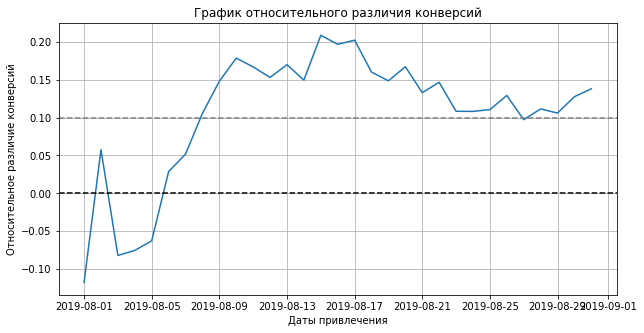

In [27]:
df_all = df_a.merge(df_b, on='date', how='outer', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.plot(df_all['date'], df_all['conversionB']/df_all['conversionA']-1)
plt.xlabel('Даты привлечения')
plt.ylabel('Относительное различие конверсий')
plt.title('График относительного различия конверсий')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--') 
plt.plot()

Отношение конверсий в целом говорит за вариант B разница между конверсиями установилась в начале, затем немного упала, в целом возвращается к исходному уровню

Построим точечный график количества заказов по пользователям

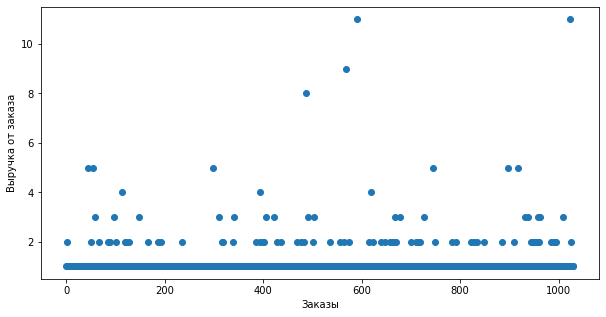

In [28]:
user_orders = orders.groupby('user_id', as_index=False).agg({'order_id' : 'nunique'})
x_values = pd.Series(range(0,len(user_orders['order_id'])))
plt.figure(figsize=(10, 5))
plt.xlabel('Заказы')
plt.ylabel('Выручка от заказа')
plt.scatter(x_values, user_orders['order_id'])
plt.show()

В целом оснавная группа товаров сосредоточена на 3 заказа и менее, есть ещё не много численная часть заказавших 4 и 5 заказов, и отдельные выбросы с 8 заказами и более 

In [29]:
print(np.percentile(user_orders.order_id, [95,99]))

[2. 4.]


нижнюю границу по отсечению следует взять 4 заказа (отсекая 1 процент пользователей)

Постройте точечный график стоимостей заказов и вычислим 95 и 99 перцентиль

In [30]:
orders.revenue.describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

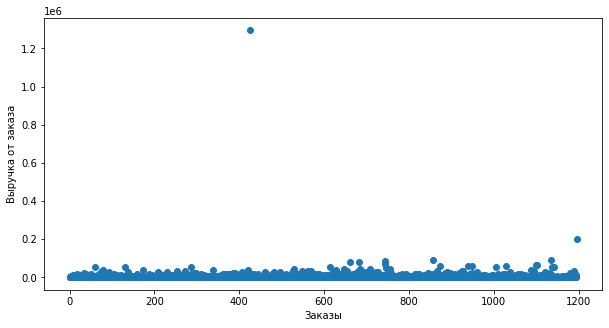

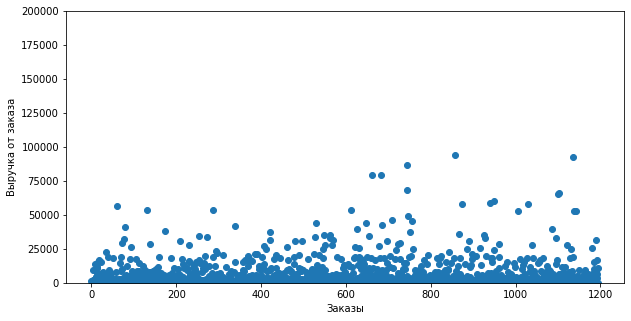

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.xlabel('Заказы')
plt.ylabel('Выручка от заказа')
plt.scatter(x_values, orders['revenue'])

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.xlabel('Заказы')
plt.ylabel('Выручка от заказа')
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,200000)
plt.show()

In [32]:
print(np.percentile(orders.revenue, [95,99]))

[28000.  58233.2]


Можно отсечь один процент пользователей с заказами свыше 58233.2, так как свыше данной показателя уже идут редкие выбросы по показателю суммы заказов

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным

Нулевая гипотеза (Н0) будет состоять в том, что наблюдаемые группы одинаковые

Альтернативная гиппотеза (Н1) будет состоять в том, что наблюдаемые группы различны

Уровень значимости а = 0,05 (5%)

Метод проверки гипотезы: непараметрический тест Уилкоксона-Манна-Уитни

In [33]:
orders.head()

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [34]:
conver_a = orders.query('group == "A"').groupby('user_id', as_index=False).agg({'order_id':'nunique'})
conver_a.columns = ['user_id','orders']
conver_b = orders.query('group == "B"').groupby('user_id', as_index=False).agg({'order_id':'nunique'})
conver_b.columns = ['user_id','orders']
conver_a.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [35]:
visits_a = visits.query('group == "A"')
visits_b = visits.query('group == "B"')
visits_a.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [36]:
sampleA = pd.concat(
    [conver_a['orders'],
     pd.Series(
         0,
         index=np.arange(visits_a.visitors.sum() - len(conver_a['orders'])), name='orders'
     )],axis=0)

sampleB = pd.concat(
    [conver_b['orders'],
     pd.Series(
         0,
         index=np.arange(visits_b.visitors.sum() - len(conver_b['orders'])), name='orders'
     )],axis=0)

In [37]:
results = st.mannwhitneyu(sampleA, sampleB)
print('p-значение: ', results.pvalue)
print(sampleB.mean() / sampleA.mean() - 1)

p-значение:  0.016792355056752608
0.13807884655320146


по результату p_value можно отметить, что мы отвергаем теорию о том, что группы одинаковые (показатель p_value составил 1,6 процента что достаточно низкий показатель). При этом группа В почти на 14 процентов превосходит группу А по показателю конверсии

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза (Н0) будет состоять в том, что наблюдаемые группы одинаковые

Альтернативная гиппотеза (Н1) будет состоять в том, что наблюдаемые группы различны

Уровень значимости а = 0,05 (5%)

Метод проверки гипотезы: непараметрический тест Уилкоксона-Манна-Уитни

In [38]:
results = st.mannwhitneyu(
    orders.query('group == "A"').revenue,
    orders.query('group == "B"').revenue)
print('p-значение: ', results.pvalue)
print(orders.query('group == "B"').revenue.mean()/orders.query('group == "A"').revenue.mean() - 1)

p-значение:  0.7292909855432458
0.2587136699126005


Мы не можем опровергнуть нулевую гиппотезу, о том что группы одинаковые, показатель p_value составляет 72 процента, что говорит о высокой вероятности равенства групп А и В по среднему чеку. Средний чек по группе B больше группы А на 25 процентов

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Нулевая гипотеза (Н0) будет состоять в том, что наблюдаемые группы одинаковые

Альтернативная гиппотеза (Н1) будет состоять в том, что наблюдаемые группы различны

Уровень значимости а = 0,05 (5%)

Метод проверки гипотезы: непараметрический тест Уилкоксона-Манна-Уитни

Для начала очистим данные сначало по заказам

In [39]:
not_users = user_orders.query('order_id > 4').user_id
list(not_users)

[199603092,
 237748145,
 1230306981,
 2038680547,
 2378935119,
 2458001652,
 3062433592,
 3717692402,
 3803269165,
 4256040402]

In [40]:
conver_a = orders.query('group == "A" and user_id not in @not_users').groupby('user_id', as_index=False).agg({'order_id':'nunique'})
conver_a.columns = ['user_id','orders']

conver_b = orders.query('group == "B" and user_id not in @not_users').groupby('user_id', as_index=False).agg({'order_id':'nunique'})
conver_b.columns = ['user_id','orders']


Далее очистим данные по сумме заказа

In [41]:
orders = orders.query('revenue <= 58233.2')


Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным

Нулевая гипотеза (Н0) будет состоять в том, что наблюдаемые группы одинаковые

Альтернативная гиппотеза (Н1) будет состоять в том, что наблюдаемые группы различны

Уровень значимости а = 0,05 (5%)

Метод проверки гипотезы: непараметрический тест Уилкоксона-Манна-Уитни

In [42]:
sampleA = pd.concat(
    [conver_a['orders'],
     pd.Series(
         0,
         index=np.arange(visits_a.visitors.sum() - len(conver_a['orders'])), name='orders'
     )],axis=0)

sampleB = pd.concat(
    [conver_b['orders'],
     pd.Series(
         0,
         index=np.arange(visits_b.visitors.sum() - len(conver_b['orders'])), name='orders'
     )],axis=0)

In [43]:
results = st.mannwhitneyu(sampleA, sampleB)
print('p-значение: ', results.pvalue)
print(sampleB.mean() / sampleA.mean() - 1)

p-значение:  0.01569391625334781
0.14987251563476045


Удаление пользователей с большим количеством заказов не повлияло на результат теста (нулевая гипотиза о равенстве групп может быть опровергнута). По чистым данным показатель конверсии по группе B увеличил отрыв и стал достигать 15 процентов.


Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза (Н0) будет состоять в том, что наблюдаемые группы одинаковые

Альтернативная гиппотеза (Н1) будет состоять в том, что наблюдаемые группы различны

Уровень значимости а = 0,05 (5%)

Метод проверки гипотезы: непараметрический тест Уилкоксона-Манна-Уитни

In [44]:
results = st.mannwhitneyu(
    orders.query('group == "A"').revenue,
    orders.query('group == "B"').revenue)
print('p-значение: ', results.pvalue)
print(orders.query('group == "B"').revenue.mean()/orders.query('group == "A"').revenue.mean() - 1)

p-значение:  0.6208626966847455
0.018870874545377614


Удаление в выбросах убрало разницу в размере средних чеков между группами, как и по сырым данным мы можем подвердить теорию о равенстве группы А и B по показателю среднего чека.

Очищение данных не повлияли на статистическую значимость в различиях конверсий между группами p-значение осталось таким же, разница В группы увеличилась на 1 процент.

Очищение данных не волияло на статистическую значимость различий в среднем чеке p-значение осталось выше уровня значимости, но в подвержении нулевой гиппотезе теперь разница между группами А и В стала всего (1,18 %), вместо 25% по неочищенным данным

## Вывод (часть 1)

При анализе приоритезации гипотез были применены 2 параметра RICE и ICE
Вывод параметров RICE и ICE не существенно но отличаются, данные изменения произошли после учёта параметра Reach (кол-во пользователей которых затронет изменение), те гипотезы которые были при анализе параметра ICE были на более высоком месте, из за не столько широкого охвата действующих пользователей, сместились на немного низкие позиции. 

Конечной вывод по приоритетности гипотез выглядит так:

In [45]:
e = enumerate(list(hyp['Hypothesis']))
for x,y in e:
    print(f'{x+1} Место')
    print(f'{y}')
    print('-------------------------------------------------------------------------------------------')
    

1 Место
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
-------------------------------------------------------------------------------------------
2 Место
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
-------------------------------------------------------------------------------------------
3 Место
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
-------------------------------------------------------------------------------------------
4 Место
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
-------------------------------------------------------------------------------------------
5 Место
Запустить акцию, дающую скидку на товар в день рождения
-------------------------------------------------------------------------------------------
6 Место
Изменить структура категорий, 

## Вывод (часть 2)

При обработке датафреймов было выведено:
1. Дубликатов нет
2. Отсутсвующих значений нет
3. Отклонение суммы заказов (слишком большие по стоимости затраты искажают данные ) у 1 процента пользоватетей (особенно у 0,2 %)
4. даты были не втом формате

А/В можно признать удачным и завершить, группа В показала лучшие параметры по куммулятивной выручки, лучше показатель кумулятивной конверсии. Анализируя две группы, очищенных от экстремально больших заказов, методом Манна Уитни. Выяснилось, что статистической значимости различий в среднем чеке между группами не выявилось, но выявилась статитистическая значимость в различии конверсий между группами,  за анализируемый период коверсия на 15 процентов была лучше у группы В. Делаем вывод, что внедряемые новшества положительно скажутся на бизнесе. 

Однако стоит отметить, что у группы В на протяжении половины периода снижались показатели кумулятивной выручки и куммулятивный график конверсии, необходимо провести работы по выявлению причин даного снижения.